# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
ames = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [8]:
# Your code here
data.head()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
0,2008,2,0,8,1710,2,2003,2003,5,7,8450,208500
1,2007,5,1,6,1262,2,1976,1976,8,6,9600,181500
2,2008,9,1,6,1786,2,2002,2001,5,7,11250,223500
3,2006,2,1,7,1717,1,1970,1915,5,7,9550,140000
4,2008,12,1,9,2198,2,2000,2000,5,8,14260,250000


In [ ]:
# Record your observations here 

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

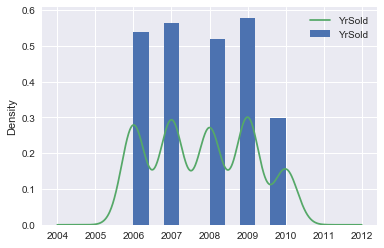

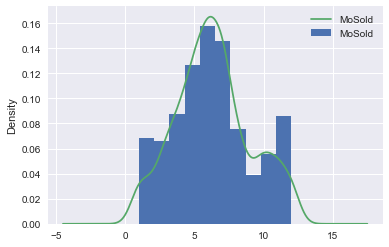

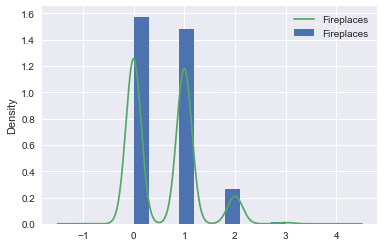

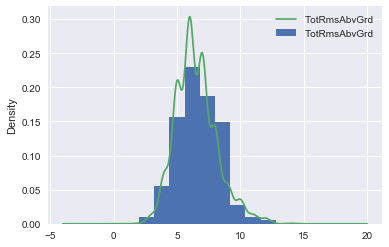

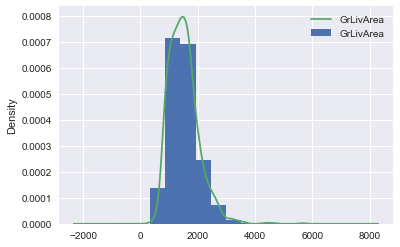

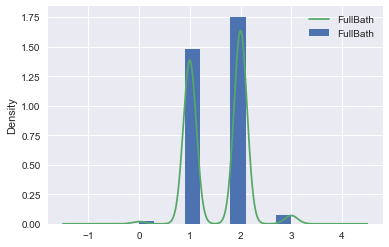

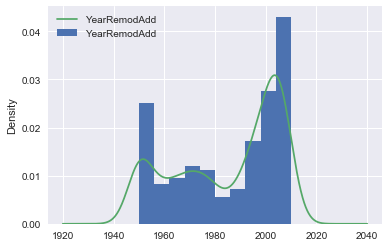

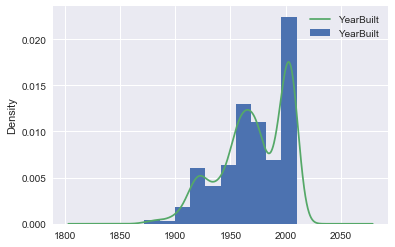

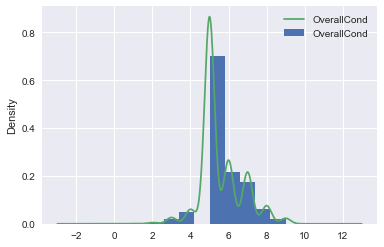

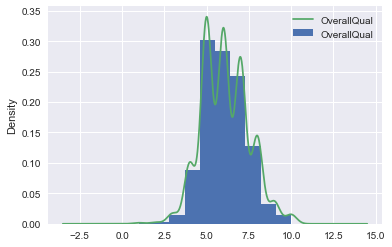

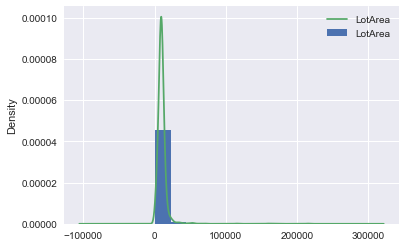

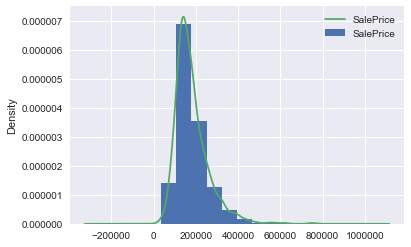

In [11]:
# Your code here 
for column in data.columns:
    plt.hist(data[column], density='True', label=column)
    data[column].plot.kde(label=column)
    plt.legend()
    plt.show()

In [ ]:
# You observations here 

### Check the linearity assumption for all chosen features with target variable using scatter plots

Text(0.5, 1.0, 'Fireplaces')

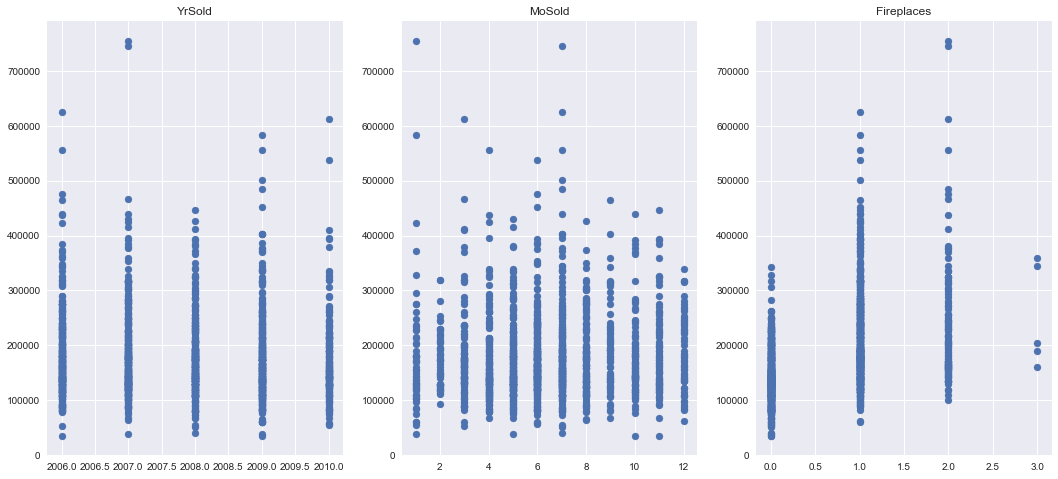

In [25]:
# Your code here
fig = plt.figure(figsize=(18,8))

ax1 = plt.subplot(131)
ax1.scatter(data['YrSold'], data['SalePrice'])
ax1.set_title('YrSold')

ax2 = plt.subplot(132)
ax2.scatter(data['MoSold'], data['SalePrice'])
ax2.set_title('MoSold')

ax3 = plt.subplot(133)
ax3.scatter(data['Fireplaces'], data['SalePrice'])
ax3.set_title('Fireplaces')



Text(0.5, 1.0, 'FullBath')

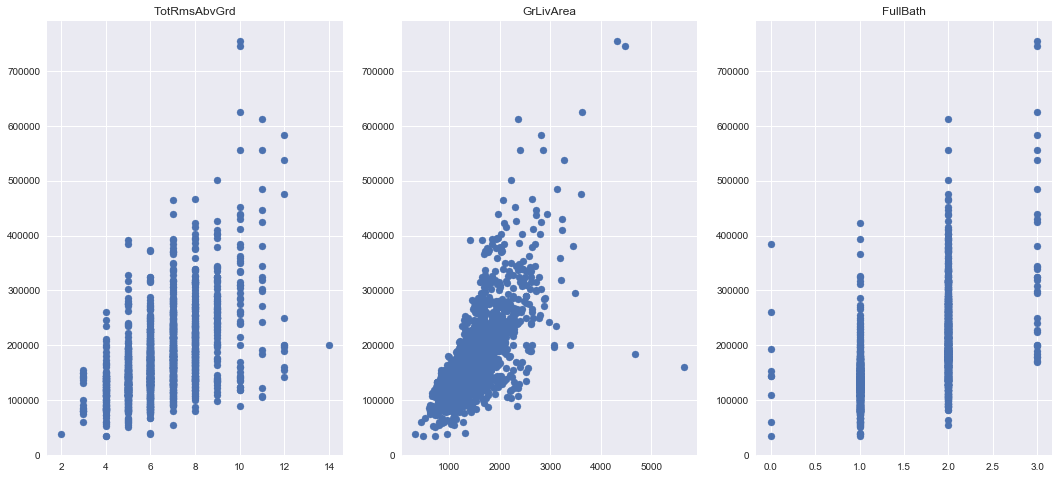

In [29]:
fig = plt.figure(figsize=(18,8))

ax4 = plt.subplot(131)
ax4.scatter(data['TotRmsAbvGrd'], data['SalePrice'])
ax4.set_title('TotRmsAbvGrd')

ax5 = plt.subplot(132)
ax5.scatter(data['GrLivArea'], data['SalePrice'])
ax5.set_title('GrLivArea')

ax6 = plt.subplot(133)
ax6.scatter(data['FullBath'], data['SalePrice'])
ax6.set_title('FullBath')

Text(0.5, 1.0, 'OverallCond')

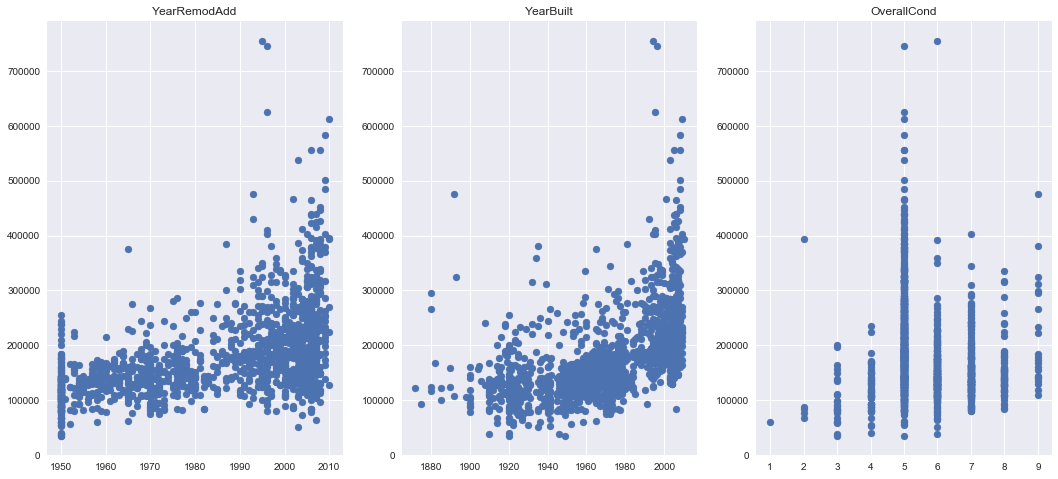

In [31]:
fig = plt.figure(figsize=(18,8))

ax7 = plt.subplot(131)
ax7.scatter(data['YearRemodAdd'], data['SalePrice'])
ax7.set_title('YearRemodAdd')

ax8 = plt.subplot(132)
ax8.scatter(data['YearBuilt'], data['SalePrice'])
ax8.set_title('YearBuilt')

ax9 = plt.subplot(133)
ax9.scatter(data['OverallCond'], data['SalePrice'])
ax9.set_title('OverallCond')

Text(0.5, 1.0, 'LotArea')

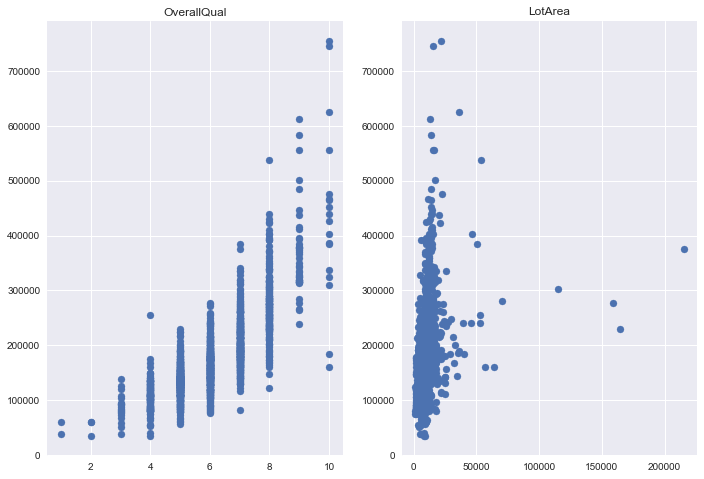

In [32]:
fig = plt.figure(figsize=(18,8))

ax10 = plt.subplot(131)
ax10.scatter(data['OverallQual'], data['SalePrice'])
ax10.set_title('OverallQual')

ax11 = plt.subplot(132)
ax11.scatter(data['LotArea'], data['SalePrice'])
ax11.set_title('LotArea')

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.221
Date:                Fri, 05 Mar 2021   Prob (F-statistic):              0.269
Time:                        15:22:32   Log-Likelihood:                -18543.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.655e+06   3.14e+06      1.162      0.2

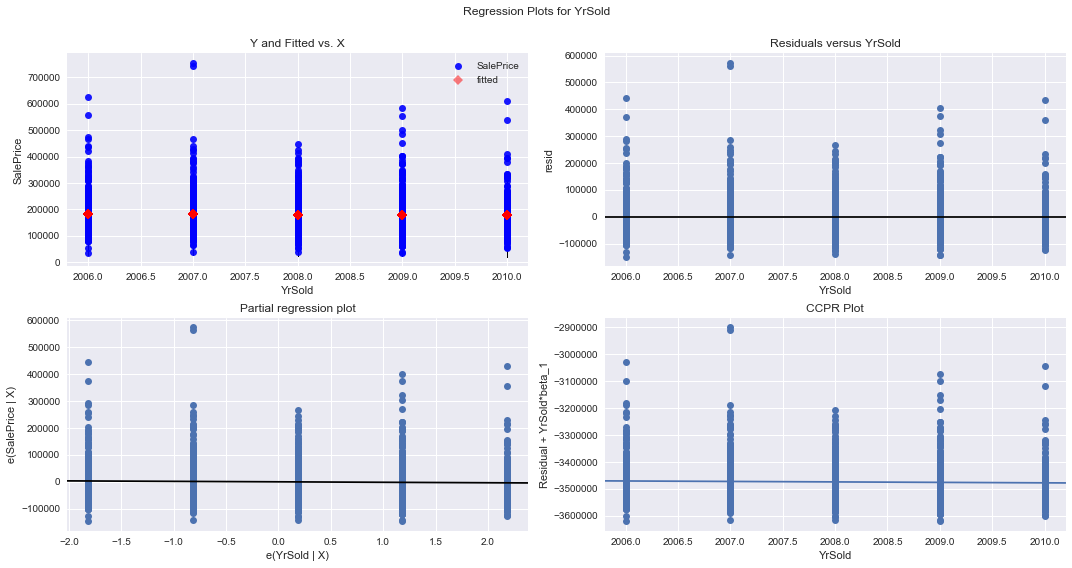

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.150
Date:                Fri, 05 Mar 2021   Prob (F-statistic):             0.0761
Time:                        15:22:33   Log-Likelihood:                -18542.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.723e+05   5285.150     32.600      0.0

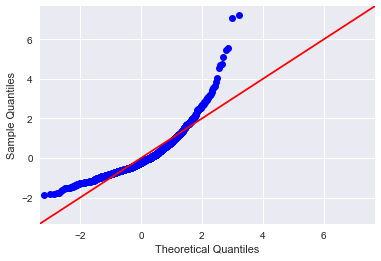

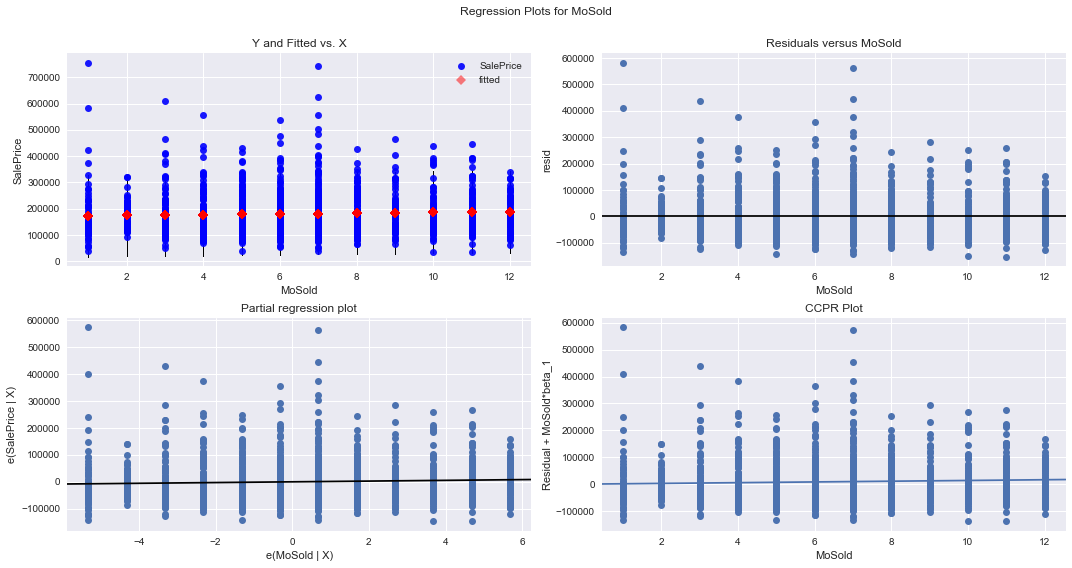

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     406.5
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           6.14e-80
Time:                        15:22:34   Log-Likelihood:                -18364.
No. Observations:                1460   AIC:                         3.673e+04
Df Residuals:                    1458   BIC:                         3.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+05   2538.346     57.379      0.0

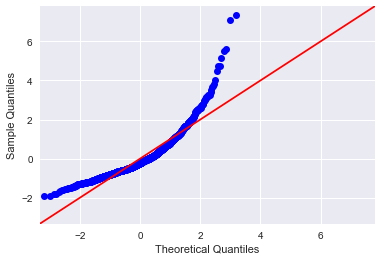

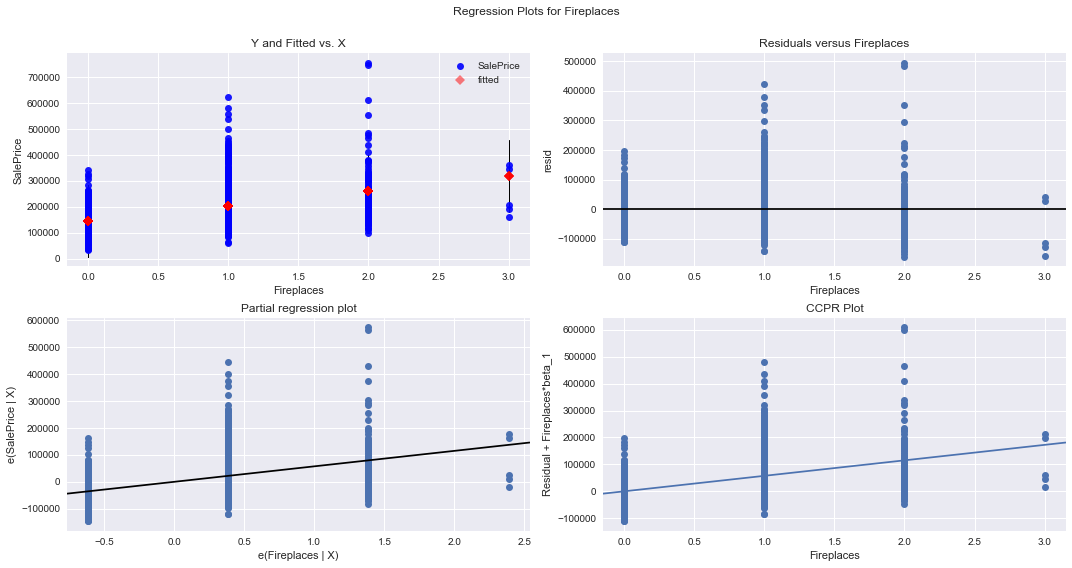

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     580.8
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          2.77e-108
Time:                        15:22:35   Log-Likelihood:                -18299.
No. Observations:                1460   AIC:                         3.660e+04
Df Residuals:                    1458   BIC:                         3.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.09e+04   7271.180      1.499   

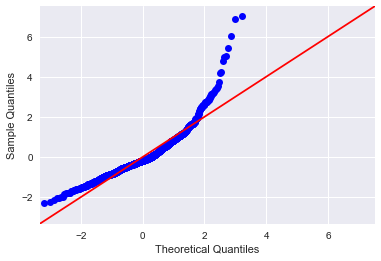

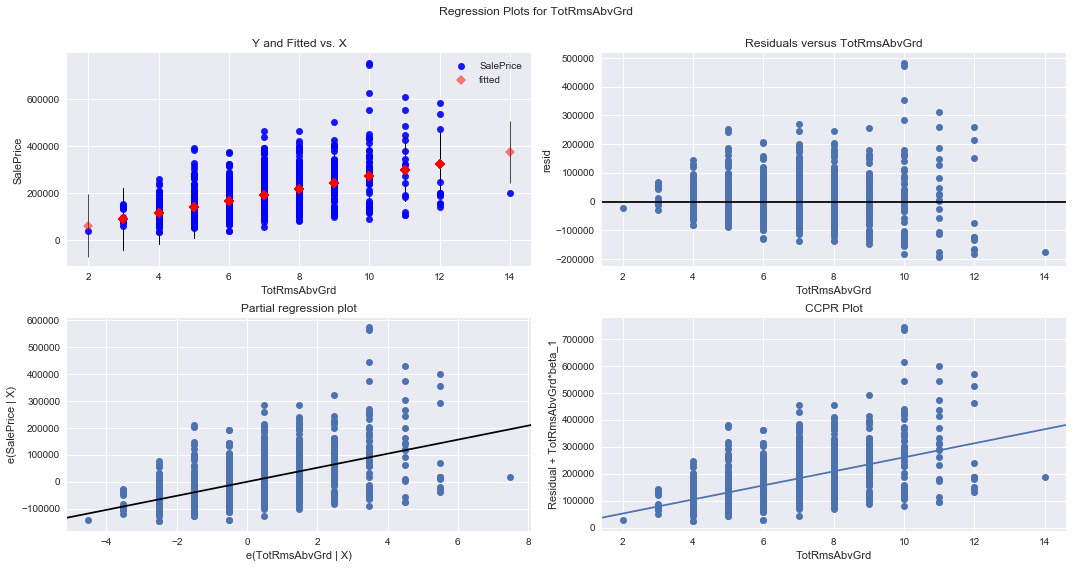

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          4.52e-223
Time:                        15:22:35   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

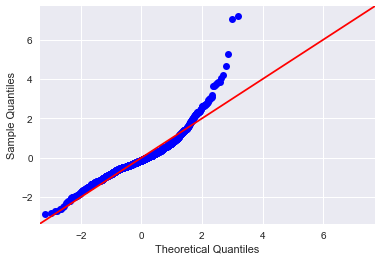

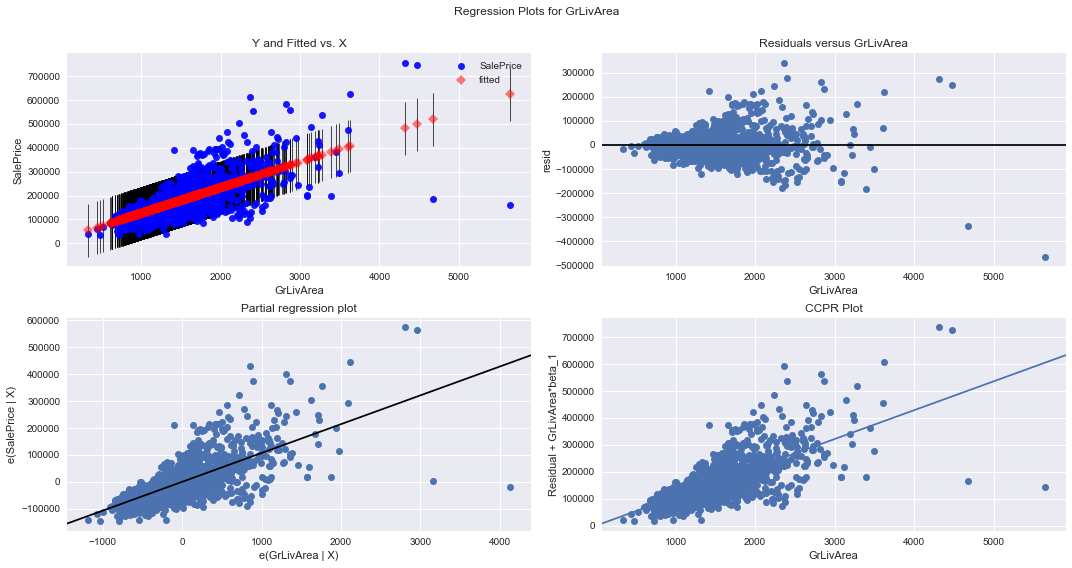

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     668.4
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          1.24e-121
Time:                        15:22:36   Log-Likelihood:                -18269.
No. Observations:                1460   AIC:                         3.654e+04
Df Residuals:                    1458   BIC:                         3.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.439e+04   5188.295     10.483      0.0

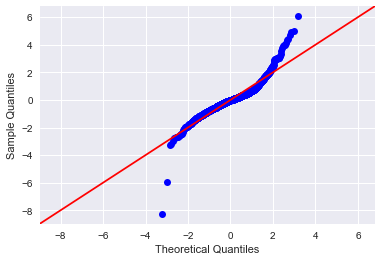

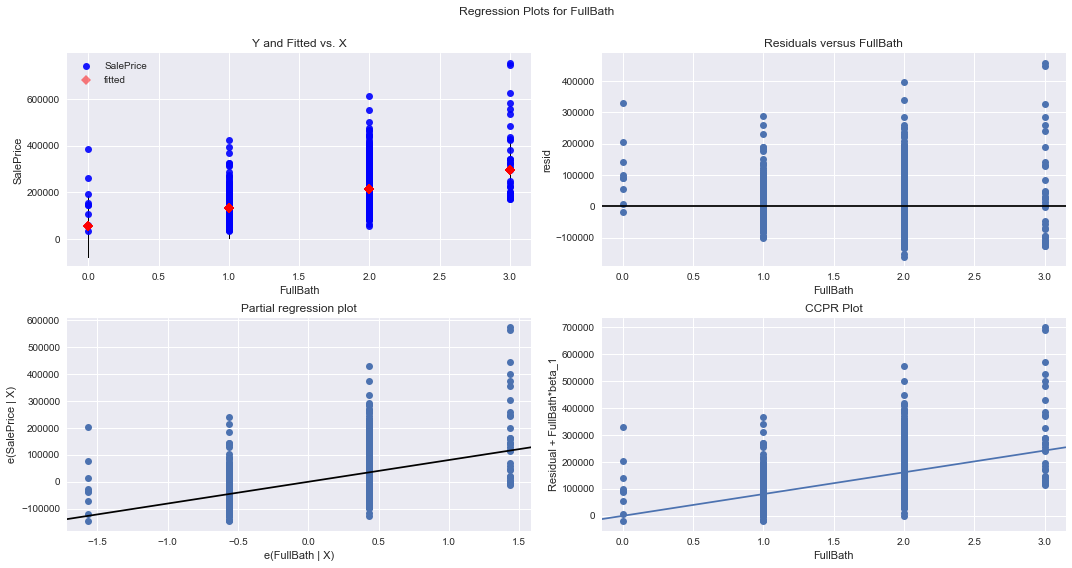

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     504.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           3.16e-96
Time:                        15:22:37   Log-Likelihood:                -18327.
No. Observations:                1460   AIC:                         3.666e+04
Df Residuals:                    1458   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.692e+06   1.72e+05    -21.415   

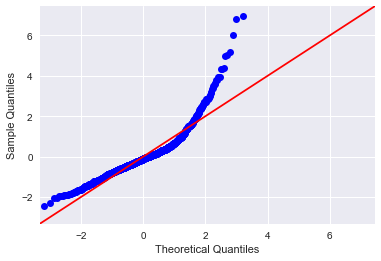

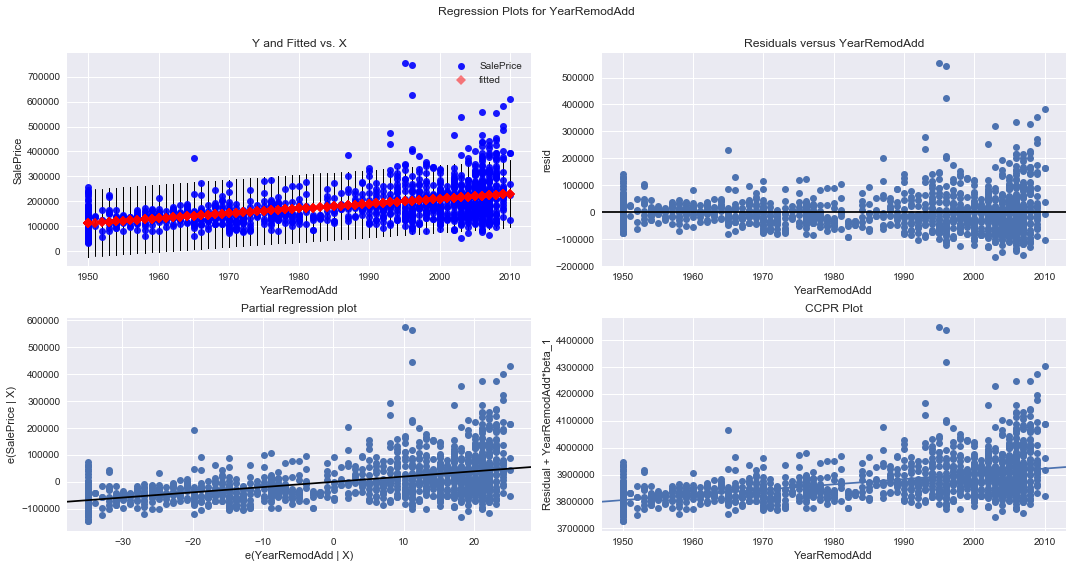

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          2.99e-103
Time:                        15:22:38   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.53e+06   1.16e+05    -21.858      0.0

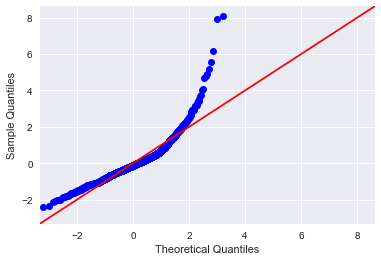

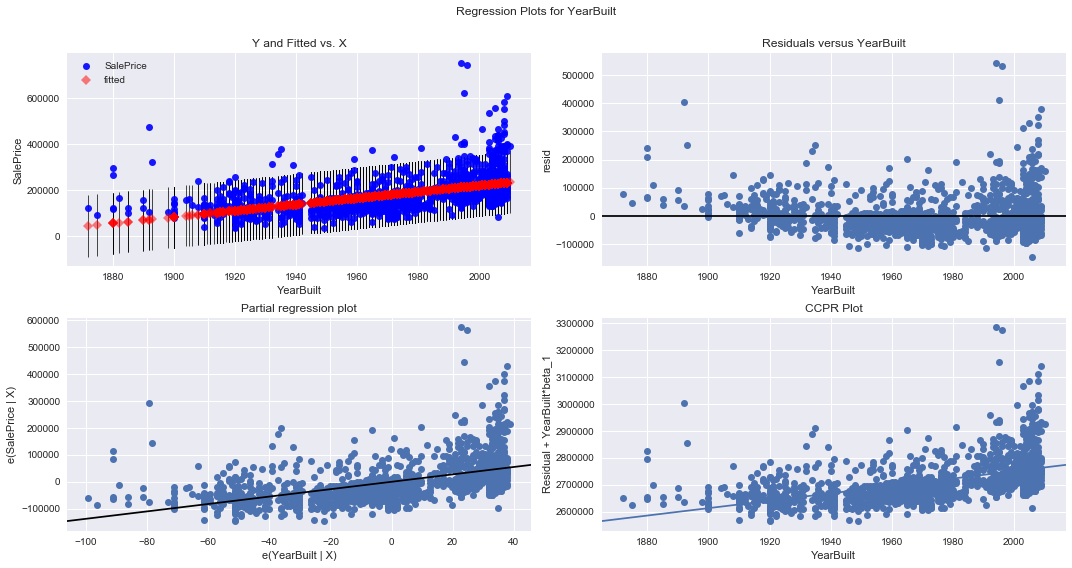

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.892
Date:                Fri, 05 Mar 2021   Prob (F-statistic):            0.00291
Time:                        15:22:39   Log-Likelihood:                -18540.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1458   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.119e+05   1.06e+04     19.997      

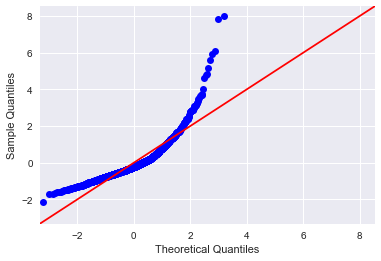

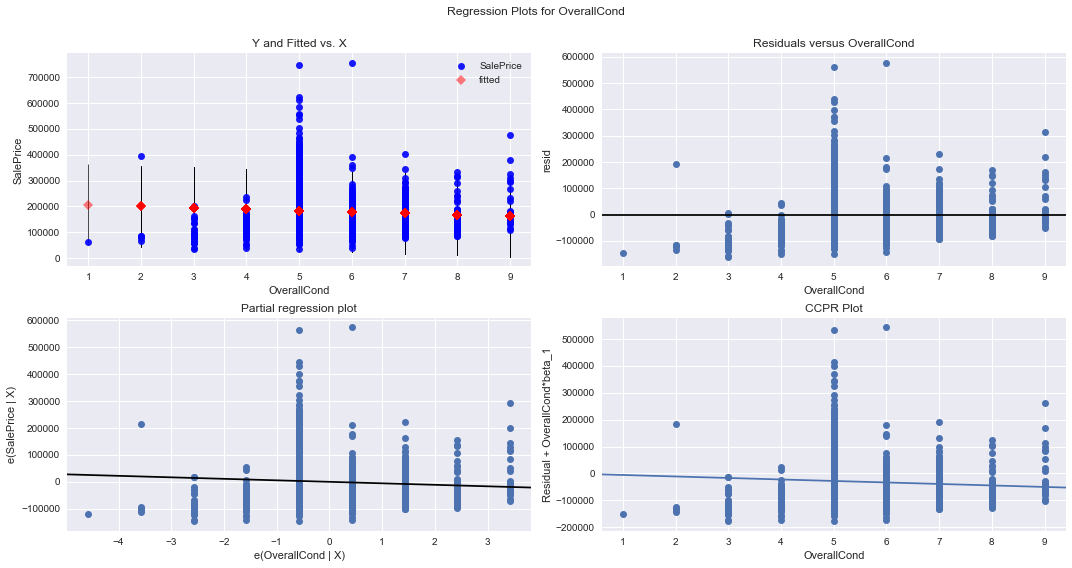

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          2.19e-313
Time:                        15:22:40   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

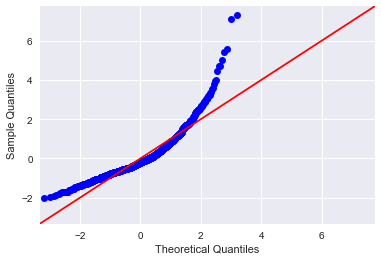

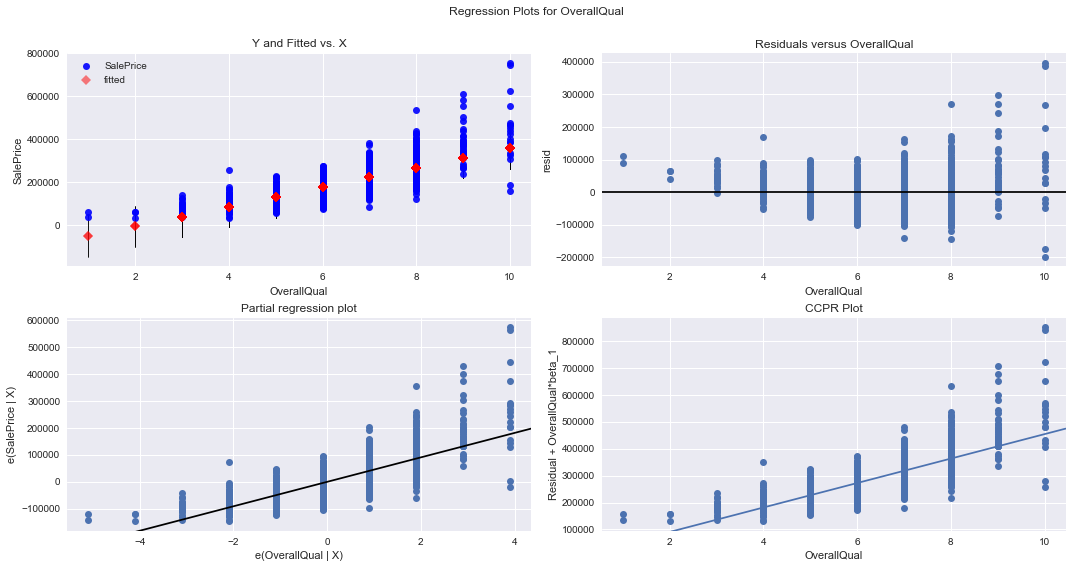

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.12e-24
Time:                        15:22:41   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+05   2914.717     54.495      0.0

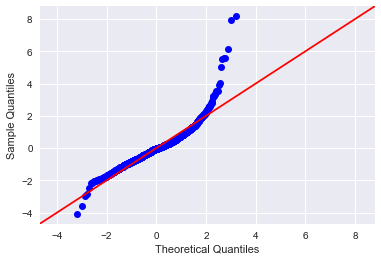

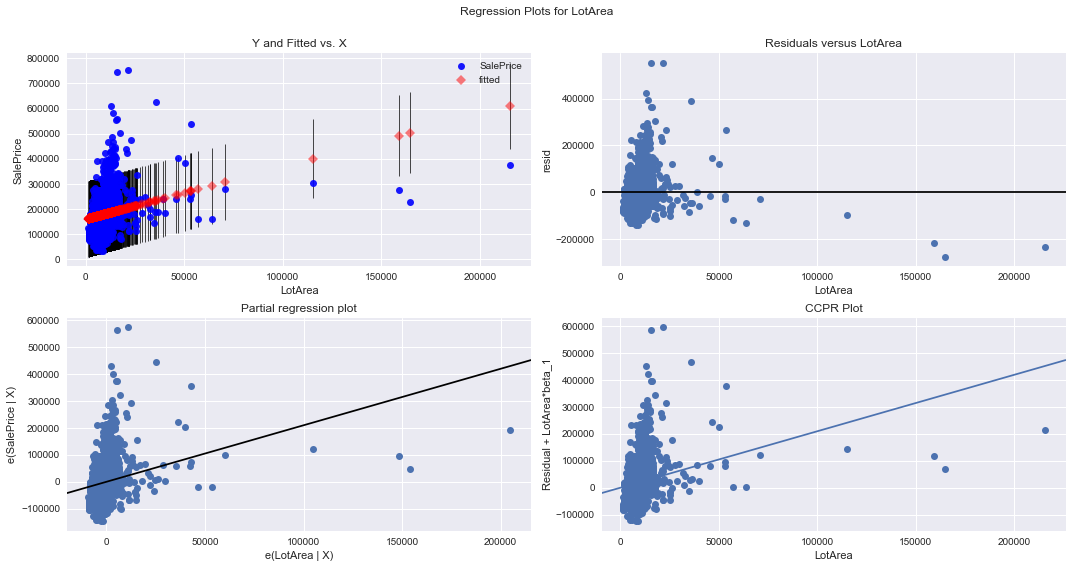

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.052e+34
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:22:42   Log-Likelihood:                 34103.
No. Observations:                1460   AIC:                        -6.820e+04
Df Residuals:                    1458   BIC:                        -6.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.365e-11   1.13e-12     29.756      0.0

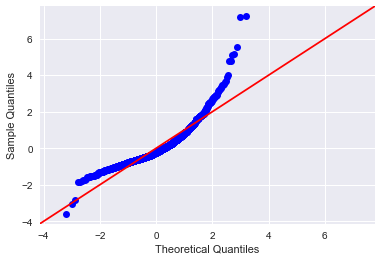

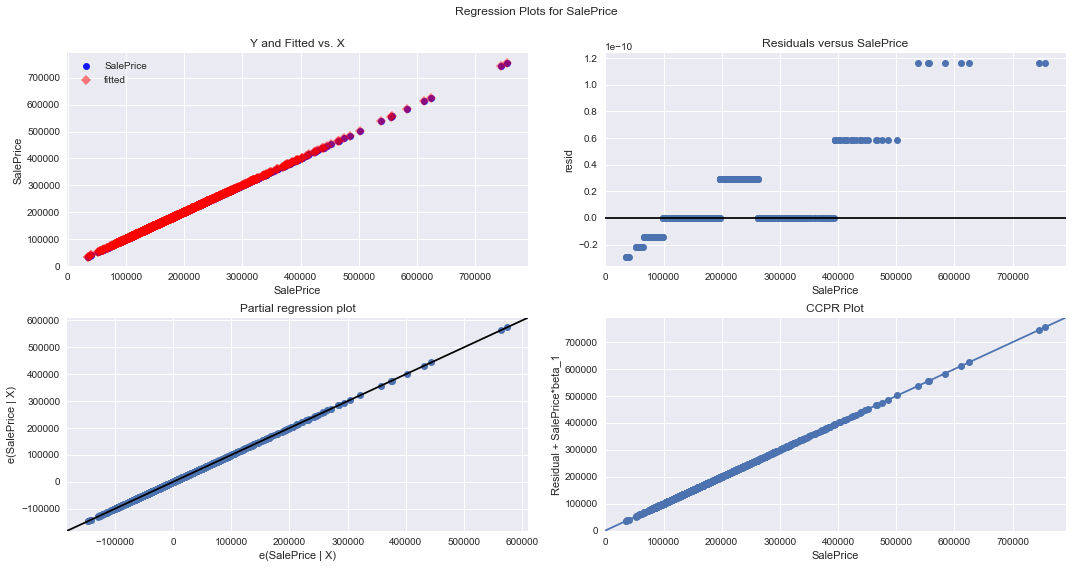

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


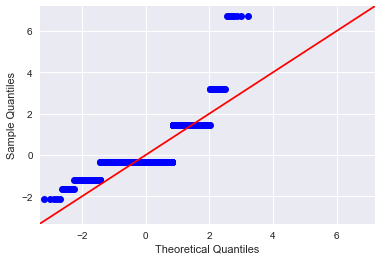

In [55]:
array = []
for column in data.columns:
    f = f'SalePrice~{column}'
    model = ols(formula=f, data=data).fit()
    print(model.summary())
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    plt.show()
    residuals = model.resid
    fig2 = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    fig2.show()
    array.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.